In [15]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [16]:
import pandas as pd

# Load the Boston CSV
boston = pd.read_csv("../Data/boston.csv")
boston.head()

/tmp/ipykernel_12630/3134863709.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  boston = pd.read_csv("../Data/boston.csv")


,_id,PID,CM_ID,GIS_ID,ST_NUM,ST_NUM2,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_SYSTEM,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,1,100001000,NaN,100001000,104.0,NaN,PUTNAM ST,NaN,EAST BOSTON,2128.0,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,2,100002000,NaN,100002000,197.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,3,100003000,NaN,100003000,199.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,4,100004000,NaN,100004000,201.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,5,100005000,NaN,100005000,203.0,NaN,Lexington ST,NaN,EAST BOSTON,2128.0,...,N - No Remodeling,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN


In [6]:
# View basic info
boston.info()

# View summary statistics
boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183445 entries, 0 to 183444
Data columns (total 67 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _id                  183445 non-null  int64  
 1   PID                  183445 non-null  int64  
 2   CM_ID                94723 non-null   float64
 3   GIS_ID               183445 non-null  int64  
 4   ST_NUM               174130 non-null  float64
 5   ST_NUM2              22165 non-null   float64
 6   ST_NAME              183445 non-null  object 
 7   UNIT_NUM             83855 non-null   object 
 8   CITY                 183442 non-null  object 
 9   ZIP_CODE             183442 non-null  float64
 10  BLDG_SEQ             183445 non-null  int64  
 11  NUM_BLDGS            183445 non-null  int64  
 12  LUC                  183445 non-null  int64  
 13  LU                   183445 non-null  object 
 14  LU_DESC              183445 non-null  object 
 15  BLDG_TYPE        

,_id,PID,CM_ID,GIS_ID,ST_NUM,ST_NUM2,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,...,LIVING_AREA,YR_BUILT,YR_REMODEL,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,FIREPLACES,NUM_PARKING
count,183445.000000,1.834450e+05,9.472300e+04,1.834450e+05,174130.000000,22165.000000,183442.000000,183445.0,183445.000000,183445.000000,...,1.494210e+05,160778.000000,87983.000000,134824.000000,171043.000000,171180.000000,170973.000000,134748.000000,171426.000000,134989.000000
mean,91723.000000,1.138812e+09,9.183336e+08,1.138813e+09,226.972521,258.810738,2129.853888,1.0,1.000033,202.718564,...,4.443069e+03,1933.777656,2002.841378,3.140791,1.375642,0.224588,1.056757,6.917030,0.268857,1.322915
std,52956.154403,7.094946e+08,6.903170e+08,7.094955e+08,474.772967,499.074659,30.657401,0.0,0.005719,266.618234,...,3.826235e+04,64.158952,88.952195,2.104657,1.065191,0.461921,0.800881,4.002484,0.622966,2.401002
min,1.000000,1.000010e+08,1.000100e+08,1.000010e+08,0.000000,-31.000000,2026.000000,1.0,1.000000,13.000000,...,2.000000e+00,1700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,45862.000000,5.015470e+08,3.067310e+08,5.015480e+08,24.000000,27.000000,2119.000000,1.0,1.000000,102.000000,...,9.420000e+02,1900.000000,1987.000000,2.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,91723.000000,1.102605e+09,6.026660e+08,1.102605e+09,69.000000,78.000000,2127.000000,1.0,1.000000,102.000000,...,1.478800e+03,1920.000000,2005.000000,3.000000,1.000000,0.000000,1.000000,6.000000,0.000000,1.000000
75%,137584.000000,1.810466e+09,1.602331e+09,1.810466e+09,216.000000,277.000000,2131.000000,1.0,1.000000,108.000000,...,2.587500e+03,1965.000000,2016.000000,4.000000,2.000000,0.000000,1.000000,9.000000,0.000000,2.000000
max,183445.000000,2.205670e+09,2.205665e+09,2.205670e+09,5341.000000,5343.000000,2467.000000,1.0,2.000000,995.000000,...,6.982322e+06,20198.000000,20220.000000,21.000000,21.000000,7.000000,5.000000,20.000000,12.000000,210.000000


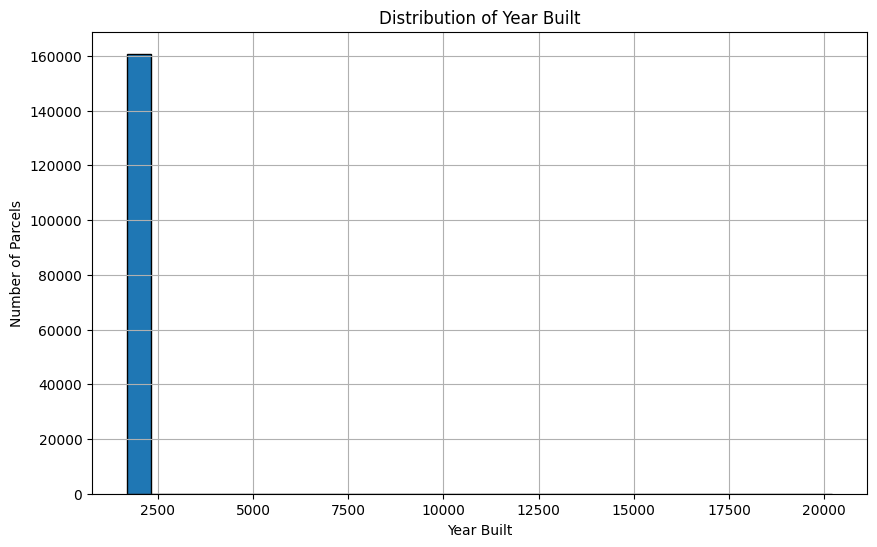

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
boston["YR_BUILT"].hist(bins=30, edgecolor="black")
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Number of Parcels")
plt.show()

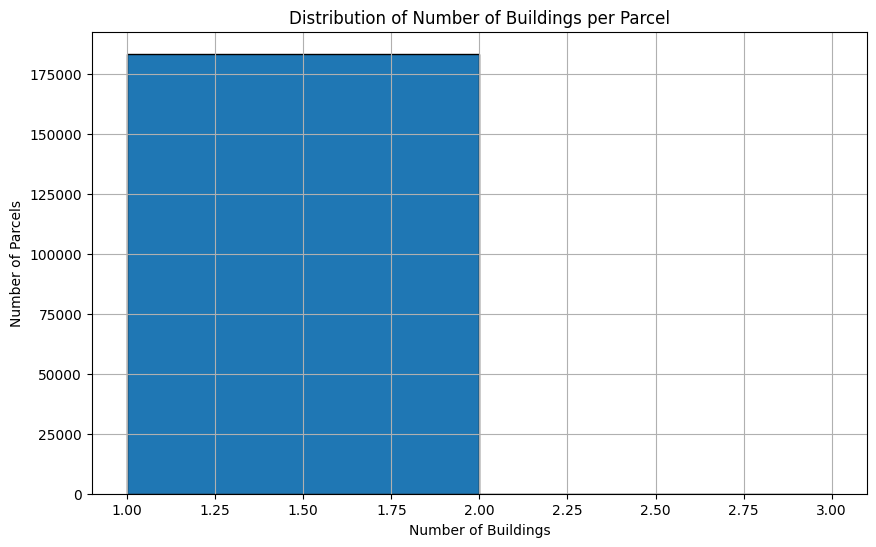

In [8]:
plt.figure(figsize=(10, 6))
boston["NUM_BLDGS"].hist(bins=range(1, boston["NUM_BLDGS"].max()+2), edgecolor="black")
plt.title("Distribution of Number of Buildings per Parcel")
plt.xlabel("Number of Buildings")
plt.ylabel("Number of Parcels")
plt.show()

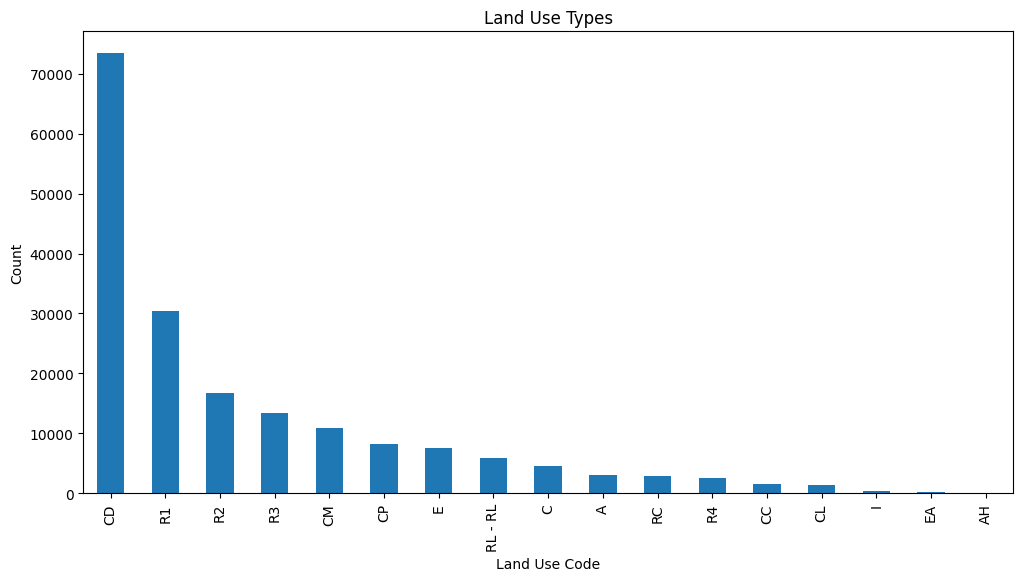

In [9]:
boston["LU"].value_counts().plot(kind="bar", figsize=(12, 6))
plt.title("Land Use Types")
plt.xlabel("Land Use Code")
plt.ylabel("Count")
plt.show()

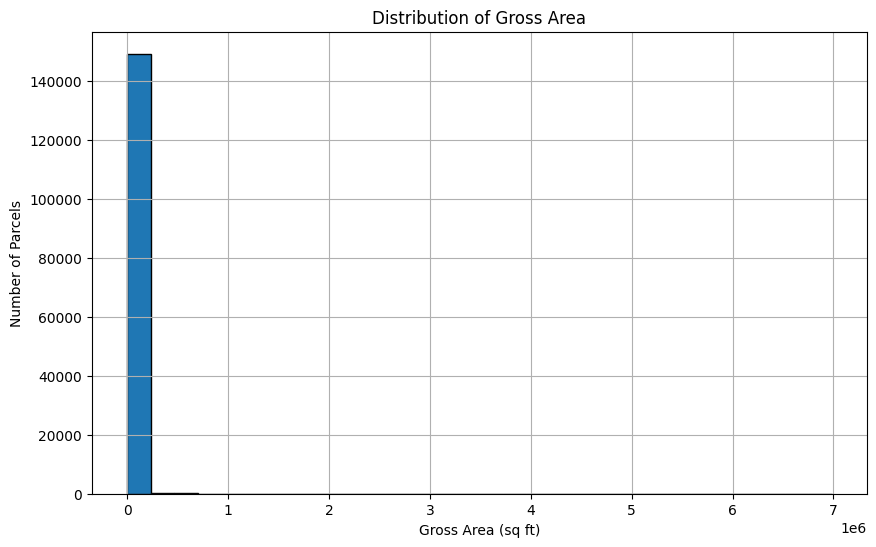

In [10]:
plt.figure(figsize=(10, 6))
boston["GROSS_AREA"].hist(bins=30, edgecolor="black")
plt.title("Distribution of Gross Area")
plt.xlabel("Gross Area (sq ft)")
plt.ylabel("Number of Parcels")
plt.show()

/tmp/ipykernel_12630/2127321034.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(area_by_lu.index, rotation=45)


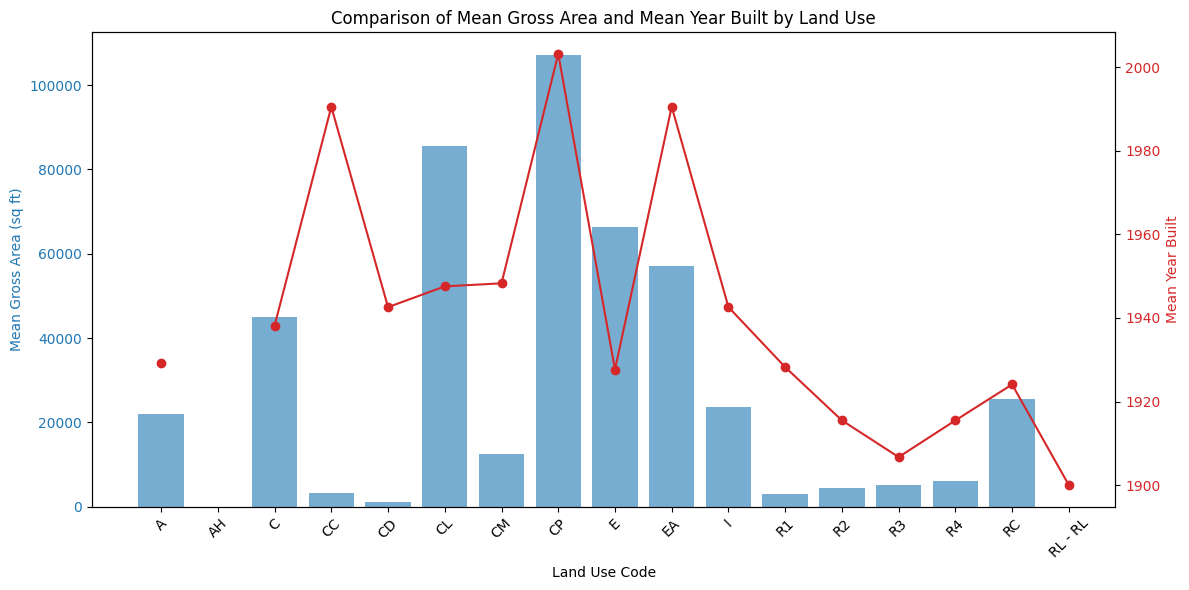

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Boston data (if not already loaded)
# boston = pd.read_csv("path/to/boston.csv")  # or use your already loaded DataFrame

# Aggregate: mean Gross Area by Land Use
area_by_lu = boston.groupby("LU")["GROSS_AREA"].mean()

# Aggregate: mean Year Built by Land Use
year_by_lu = boston.groupby("LU")["YR_BUILT"].mean()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean Gross Area (left y-axis)
color = "tab:blue"
ax1.set_xlabel("Land Use Code")
ax1.set_ylabel("Mean Gross Area (sq ft)", color=color)
ax1.bar(area_by_lu.index, area_by_lu.values, color=color, alpha=0.6, label="Mean Gross Area")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(area_by_lu.index, rotation=45)

# Create a second y-axis for Year Built
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Mean Year Built", color=color)
ax2.plot(year_by_lu.index, year_by_lu.values, color=color, marker='o', label="Mean Year Built")
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title("Comparison of Mean Gross Area and Mean Year Built by Land Use")
fig.tight_layout()
plt.show()

In [13]:
import pygwalker as pyg

# Assuming your DataFrame is named 'boston'
pyg.walk(boston)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063998c44746b0OAI8rU47fZClbp2X" style="height: auto">\n    <hea…

In [23]:
import pandas as pd

# Load your Boston property data
pluto = pd.read_csv("../Data/boston.csv")  # Adjust the path if needed

/tmp/ipykernel_12630/2341317786.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv("../Data/boston.csv")  # Adjust the path if needed


In [24]:
sample = pluto.head(100).copy()

In [25]:
import pandas as pd
pluto = pd.read_csv("../Data/boston.csv")  # or your correct path

/tmp/ipykernel_12630/832024062.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv("../Data/boston.csv")  # or your correct path


In [26]:
sample['address'] = (
    sample['ST_NUM'].fillna('').astype(str) + ' ' +
    sample['ST_NAME'].fillna('') + ', Boston, MA ' +
    sample['ZIP_CODE'].fillna('').astype(str)
)

In [27]:
print(sample['address'].head(10))

0       104.0 PUTNAM ST, Boston, MA 2128.0
1    197.0 Lexington ST, Boston, MA 2128.0
2    199.0 Lexington ST, Boston, MA 2128.0
3    201.0 Lexington ST, Boston, MA 2128.0
4    203.0 Lexington ST, Boston, MA 2128.0
5    205.0 Lexington ST, Boston, MA 2128.0
6    209.0 Lexington ST, Boston, MA 2128.0
7    213.0 Lexington ST, Boston, MA 2128.0
8    215.0 Lexington ST, Boston, MA 2128.0
9    217.0 Lexington ST, Boston, MA 2128.0
Name: address, dtype: object


In [28]:
print(sample['address'].head(10))

0       104.0 PUTNAM ST, Boston, MA 2128.0
1    197.0 Lexington ST, Boston, MA 2128.0
2    199.0 Lexington ST, Boston, MA 2128.0
3    201.0 Lexington ST, Boston, MA 2128.0
4    203.0 Lexington ST, Boston, MA 2128.0
5    205.0 Lexington ST, Boston, MA 2128.0
6    209.0 Lexington ST, Boston, MA 2128.0
7    213.0 Lexington ST, Boston, MA 2128.0
8    215.0 Lexington ST, Boston, MA 2128.0
9    217.0 Lexington ST, Boston, MA 2128.0
Name: address, dtype: object


In [30]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="boston_property_geocoder")

In [31]:
print(geolocator.geocode(sample['address'].iloc[0]))

None


In [33]:
from tqdm import tqdm
tqdm.pandas()

In [1]:
import requests
print(requests.get("https://nominatim.openstreetmap.org/").status_code)

200


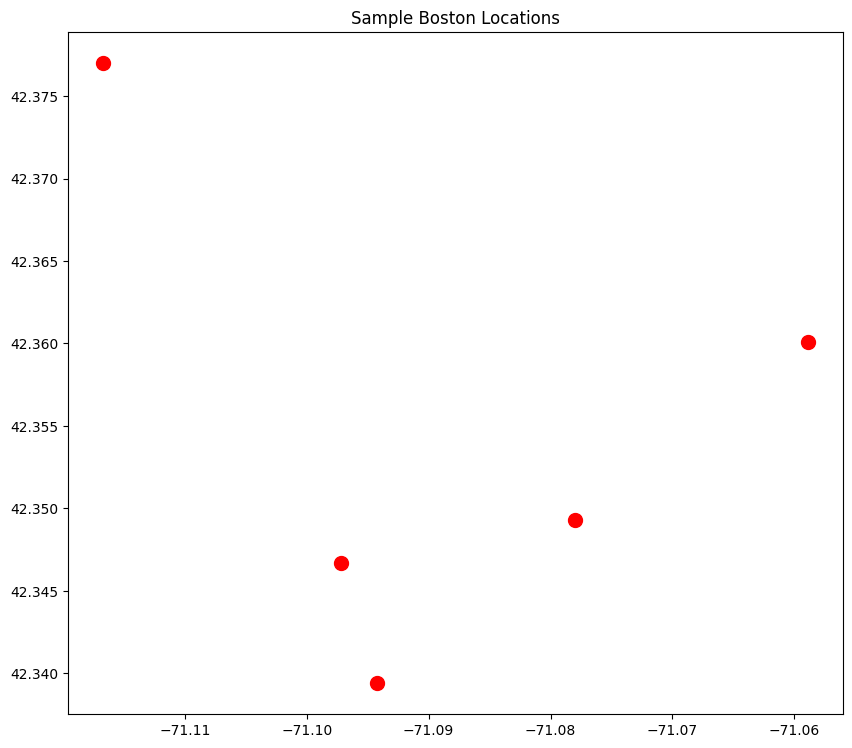

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Example sample data
data = [
    {"address": "1 City Hall Square, Boston, MA", "latitude": 42.3601, "longitude": -71.0589},
    {"address": "700 Boylston St, Boston, MA", "latitude": 42.3493, "longitude": -71.0780},
    {"address": "Museum of Fine Arts, Boston, MA", "latitude": 42.3394, "longitude": -71.0942},
    {"address": "Fenway Park, Boston, MA", "latitude": 42.3467, "longitude": -71.0972},
    {"address": "Harvard University, Cambridge, MA", "latitude": 42.3770, "longitude": -71.1167},
]

df = pd.DataFrame(data)
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

gdf.plot(figsize=(10, 10), markersize=100, color='red')
plt.title("Sample Boston Locations")
plt.show()

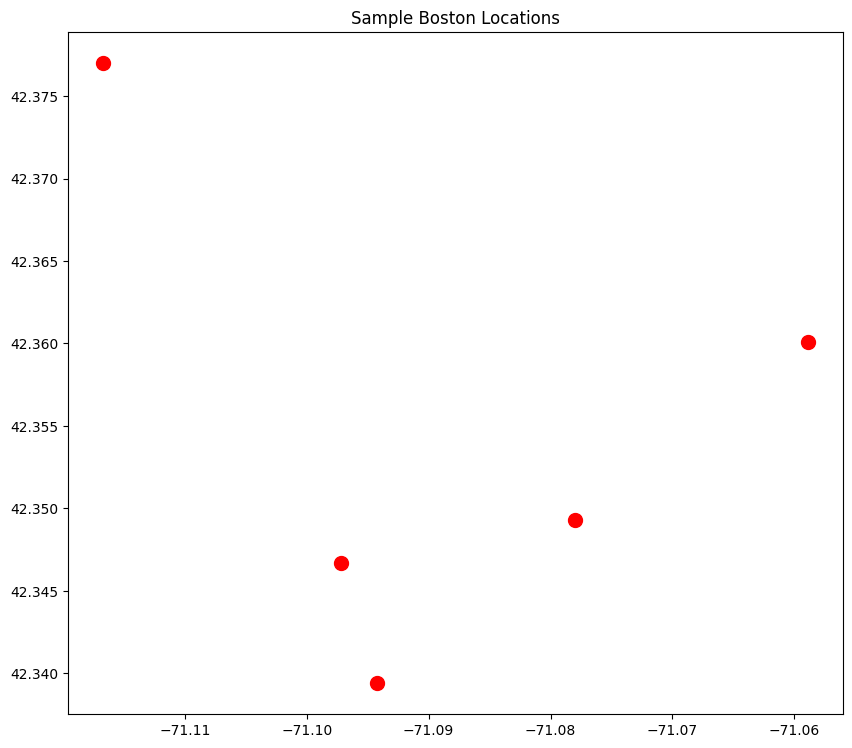

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Example geocoded Boston addresses
data = [
    {"address": "1 City Hall Square, Boston, MA", "latitude": 42.3601, "longitude": -71.0589},
    {"address": "700 Boylston St, Boston, MA", "latitude": 42.3493, "longitude": -71.0780},
    {"address": "Museum of Fine Arts, Boston, MA", "latitude": 42.3394, "longitude": -71.0942},
    {"address": "Fenway Park, Boston, MA", "latitude": 42.3467, "longitude": -71.0972},
    {"address": "Harvard University, Cambridge, MA", "latitude": 42.3770, "longitude": -71.1167},
]

df = pd.DataFrame(data)
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

gdf.plot(figsize=(10, 10), markersize=100, color='red')
plt.title("Sample Boston Locations")
plt.show()

In [7]:
import requests
print(requests.get("https://nominatim.openstreetmap.org/").status_code)

200


In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="boston_property_geocoder")
result = geolocator.geocode("1 City Hall Square, Boston, MA")
print(result)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1+City+Hall+Square%2C+Boston%2C+MA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))